In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [12]:
lactogen1 = cv2.imread('lactogen1.jpg')
lactogen1 = cv2.cvtColor(lactogen1,cv2.COLOR_BGR2RGB)

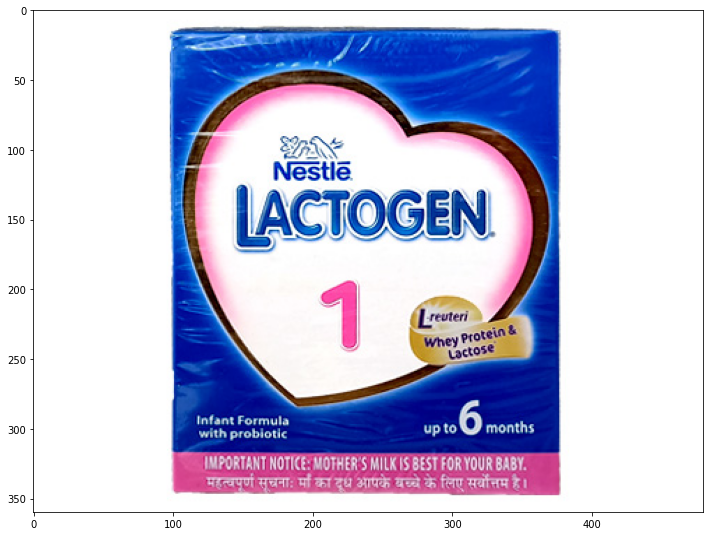

In [13]:
display(lactogen1)

In [23]:
lactogen3 = cv2.imread('lactogen3.jpg')
lactogen3 = cv2.cvtColor(lactogen3,cv2.COLOR_BGR2RGB)

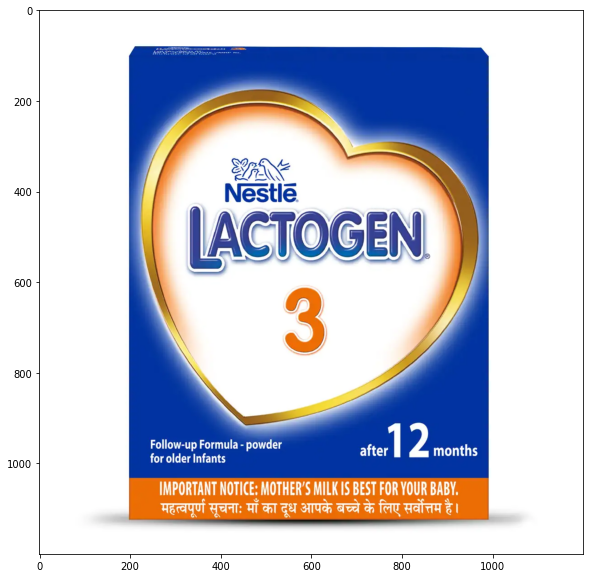

In [24]:
display(lactogen3)

In [25]:
orb = cv2.ORB_create()

In [26]:
kp1, des1 = orb.detectAndCompute(lactogen1,None)
kp2, des2 = orb.detectAndCompute(lactogen3,None)

In [27]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)

In [28]:
matches = bf.match(des1,des2)

In [29]:
len(matches)

136

In [30]:
matches = sorted(matches,key=lambda x:x.distance)

In [31]:
lactogen_matches = cv2.drawMatches(lactogen1,kp1,lactogen3,kp2,matches[:25],None,flags=2)

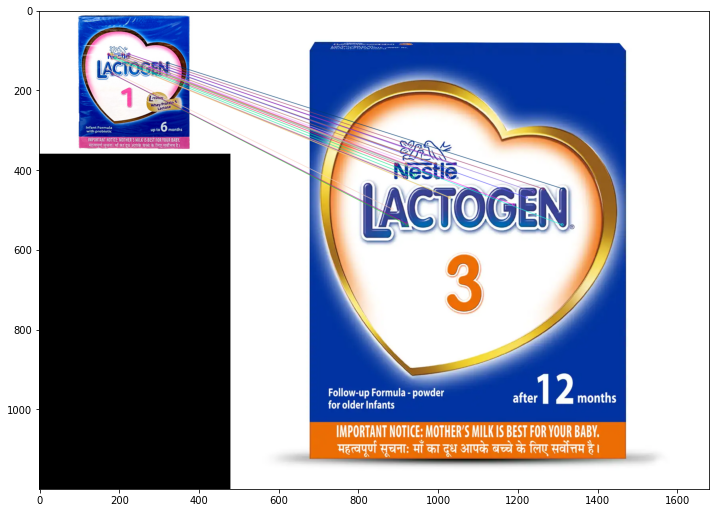

In [32]:
display(lactogen_matches)

In [33]:
sift = cv2.SIFT_create()

In [34]:
kp1, des1 = sift.detectAndCompute(lactogen1,None)
kp2, des2 = sift.detectAndCompute(lactogen3,None)

In [35]:
bf = cv2.BFMatcher()

In [36]:
des1

array([[101.,   7.,   0., ...,   0.,   0.,   0.],
       [ 93.,  10.,   0., ...,   0.,   0.,   0.],
       [ 64.,   9.,   7., ...,   0.,   0.,   0.],
       ...,
       [110.,  59.,   0., ...,   0.,   0.,   1.],
       [  3.,   1.,   2., ...,   0.,   0.,   0.],
       [  1.,   1.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [37]:
matches = bf.knnMatch(des1,des2,k=2)

In [38]:
good = []
for match1,match2 in matches:
    if match1.distance <0.75*match2.distance:
        good.append([match1])
        

In [39]:
len(good), len(matches)

(106, 581)

In [41]:
 sift_matches = cv2.drawMatchesKnn(lactogen1,kp1, lactogen3,kp2,good,None,flags=2)

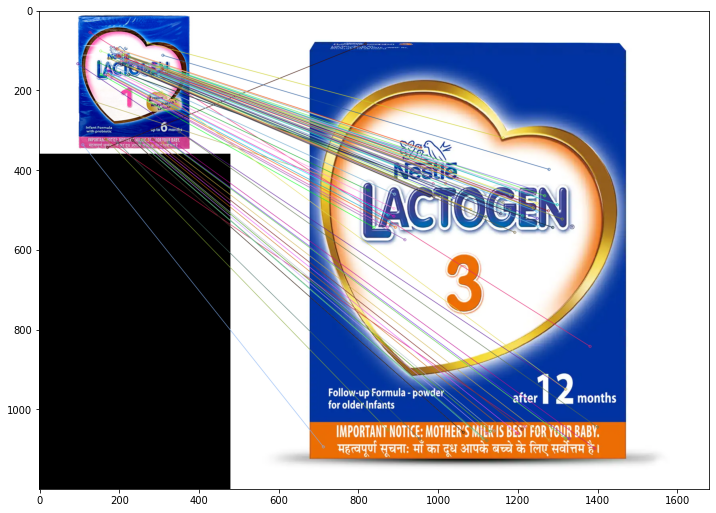

In [42]:
display(sift_matches)

In [43]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(lactogen1,None)
kp2, des2 = sift.detectAndCompute(lactogen3,None)

In [44]:
#FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [45]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [46]:
matches = flann.knnMatch(des1,des2, k=2)

In [47]:
matchesMask = [[0,0] for i in range(len(matches))]

In [48]:
for i, (match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [49]:
draw_params = dict(matchColor=(255,0,0),
                  singlePointColor=(255,0,255),
                   matchesMask=matchesMask,
                   flags = 0)

In [51]:
flann_matches = cv2.drawMatchesKnn(lactogen1,kp1,lactogen3,kp2,matches,None,**draw_params)

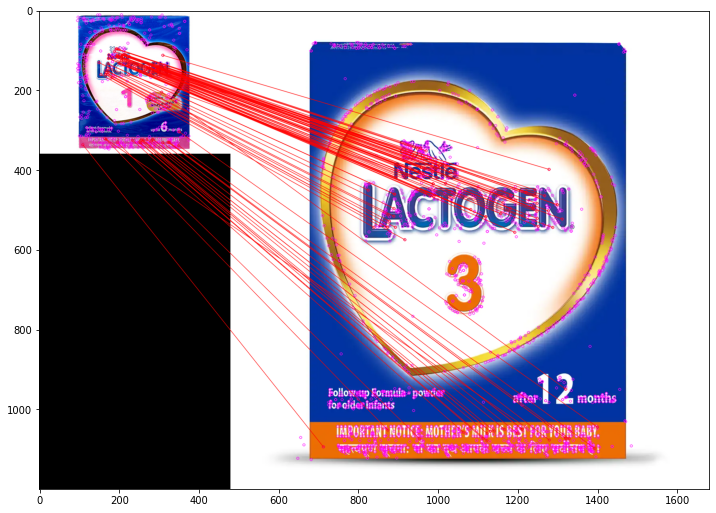

In [52]:
display(flann_matches)

In [53]:
matches

((<DMatch 00000242BB1E3710>, <DMatch 00000242BB1E2FD0>),
 (<DMatch 00000242BB1E3070>, <DMatch 00000242B87EB490>),
 (<DMatch 00000242BA9A8390>, <DMatch 00000242BA9A8170>),
 (<DMatch 00000242BA9A8110>, <DMatch 00000242BAA34090>),
 (<DMatch 00000242BAA34A90>, <DMatch 00000242BAA34730>),
 (<DMatch 00000242BAA34270>, <DMatch 00000242BAA34970>),
 (<DMatch 00000242BAA34B50>, <DMatch 00000242BAA341F0>),
 (<DMatch 00000242BAA34110>, <DMatch 00000242BAA34A70>),
 (<DMatch 00000242BAA343F0>, <DMatch 00000242BAA34670>),
 (<DMatch 00000242BAA34A30>, <DMatch 00000242BAA34210>),
 (<DMatch 00000242BAA349D0>, <DMatch 00000242BAA34630>),
 (<DMatch 00000242BAA34650>, <DMatch 00000242BAA349B0>),
 (<DMatch 00000242BAA34A50>, <DMatch 00000242BAA34950>),
 (<DMatch 00000242BAA34D70>, <DMatch 00000242BAA34D50>),
 (<DMatch 00000242BAA34AB0>, <DMatch 00000242BAA340B0>),
 (<DMatch 00000242BAA34AF0>, <DMatch 00000242BAA34990>),
 (<DMatch 00000242BAA34C70>, <DMatch 00000242BAA34C50>),
 (<DMatch 00000242BAA34CD0>, <D